In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pydicom as pyd

In [2]:
#Read COPD Gene spreadsheet and get an idea of cases versus controls versus unknowns (clean the spreadsheet)
copd = pd.read_excel("/fs5/p_masi/krishar1/COPDGENE/COPD-gene-progress.xlsx")
copd.head()

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
0,chest,control,2,DS-CS,no,tar,COPDGene_R27796_COPDGene_R27796.tar,phs000179,0,CT,d1984536,African American,male,985333760,1944.0
1,chest,Control,2,DS-CS,no,tar,COPDGene_L26505.tar.gz,phs000179,GOLD_0_Control,CT,d1992782,Caucasian,male,679836847,1317.0
2,chest,control,2,DS-CS,no,tar,COPDGene_A65347_COPDGene_A65347.tar,phs000179,0,CT,d1984561,African American,female,1239736320,73.0
3,chest,case,2,DS-CS,no,tar,COPDGene_K93612_COPDGene_K93612.tar,phs000179,3,CT,d1984658,Caucasian,male,1131806720,NaN
4,chest,control,2,DS-CS,no,tar,COPDGene_Z48649_COPDGene_Z48649.tar,phs000179,0,CT,d1984559,African American,male,740085760,3045.0


In [3]:
#Observe the dataset
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
0,chest,control,2,DS-CS,no,tar,COPDGene_R27796_COPDGene_R27796.tar,phs000179,0,CT,d1984536,African American,male,985333760,1944.0
1,chest,Control,2,DS-CS,no,tar,COPDGene_L26505.tar.gz,phs000179,GOLD_0_Control,CT,d1992782,Caucasian,male,679836847,1317.0
2,chest,control,2,DS-CS,no,tar,COPDGene_A65347_COPDGene_A65347.tar,phs000179,0,CT,d1984561,African American,female,1239736320,73.0
3,chest,case,2,DS-CS,no,tar,COPDGene_K93612_COPDGene_K93612.tar,phs000179,3,CT,d1984658,Caucasian,male,1131806720,NaN
4,chest,control,2,DS-CS,no,tar,COPDGene_Z48649_COPDGene_Z48649.tar,phs000179,0,CT,d1984559,African American,male,740085760,3045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12098,chest,control,1,HMB,no,tar,COPDGene_W67783_COPDGene_W67783.tar,phs000179,0,CT,d1984409,European-American,male,1200496640,NaN
12099,chest,Control,1,HMB,no,tar,COPDGene_Q19809.tar.gz,phs000179,GOLD_0_Control,CT,d1992305,Caucasian,female,529506641,1819.0
12100,chest,case,1,HMB,no,tar,COPDGene_D70993_COPDGene_D70993.tar,phs000179,3,CT,d1979500,Caucasian,male,1129728000,NaN
12101,chest,Other,1,HMB,no,tar,COPDGene_C63452.tar.gz,phs000179,GOLD_1,CT,d1992576,Caucasian,male,1300595977,NaN


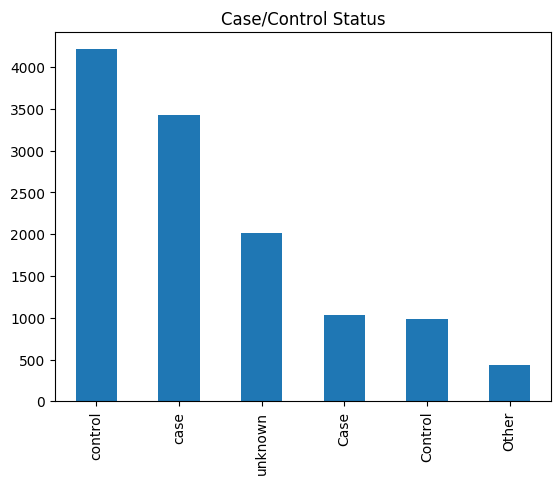

In [4]:
#Make a counpolot of Case/Control status.
copd['Case/control'].value_counts().plot(kind='bar')
plt.title('Case/Control Status')
plt.show()


In [5]:
copd.sort_values(by="File Name", inplace=True)
copd.reset_index(drop=True, inplace=True)
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
0,chest,Case,2,DS-CS,no,tar,COPDGene_A00282.tar.gz,phs000179,GOLD_3,CT,d1992781,Caucasian,female,535650641,NaN
1,chest,case,2,DS-CS,no,tar,COPDGene_A00282_COPDGene_A00282.tar,phs000179,3,CT,d1984662,Caucasian,female,1008240640,NaN
2,chest,Control,1,HMB,no,tar,COPDGene_A00444.tar.gz,phs000179,GOLD_0_Control,CT,d1990538,African,male,620153587,NaN
3,chest,control,1,HMB,no,tar,COPDGene_A00444_COPDGene_A00444.tar,phs000179,0,CT,d1975802,African American,male,1237340160,1.0
4,chest,control,1,HMB,no,tar,COPDGene_A00975_COPDGene_A00975.tar,phs000179,0,CT,d1975803,African American,male,1664419840,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12098,chest,Other,1,HMB,no,tar,COPDGene_Z99224.tar.gz,phs000179,GOLD_1,CT,d1992750,Caucasian,female,746121423,NaN
12099,chest,unknown,1,HMB,no,tar,COPDGene_Z99224_COPDGene_Z99224.tar,phs000179,1,CT,d1984177,Caucasian,female,1168793600,NaN
12100,chest,Control,1,HMB,no,tar,COPDGene_Z99278.tar.gz,phs000179,GOLD_0_Control,CT,d1992440,Caucasian,female,525661161,3117.0
12101,chest,control,1,HMB,no,tar,COPDGene_Z99278_COPDGene_Z99278.tar,phs000179,0,CT,d1982826,Caucasian,female,990300160,3116.0


In [6]:
files = os.listdir("/fs5/p_masi/krishar1/COPDGENE/new")
print(len(files))

7368


In [7]:
#check if the files in the directory are in the dataframe. if they exists, change the Downloaded status to Yes
for file in files:
    if file in copd['File Name'].values:
        copd.loc[copd['File Name'] == file, 'Downloaded'] = 'Yes'

copd


,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
0,chest,Case,2,DS-CS,Yes,tar,COPDGene_A00282.tar.gz,phs000179,GOLD_3,CT,d1992781,Caucasian,female,535650641,NaN
1,chest,case,2,DS-CS,Yes,tar,COPDGene_A00282_COPDGene_A00282.tar,phs000179,3,CT,d1984662,Caucasian,female,1008240640,NaN
2,chest,Control,1,HMB,Yes,tar,COPDGene_A00444.tar.gz,phs000179,GOLD_0_Control,CT,d1990538,African,male,620153587,NaN
3,chest,control,1,HMB,Yes,tar,COPDGene_A00444_COPDGene_A00444.tar,phs000179,0,CT,d1975802,African American,male,1237340160,1.0
4,chest,control,1,HMB,Yes,tar,COPDGene_A00975_COPDGene_A00975.tar,phs000179,0,CT,d1975803,African American,male,1664419840,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12098,chest,Other,1,HMB,no,tar,COPDGene_Z99224.tar.gz,phs000179,GOLD_1,CT,d1992750,Caucasian,female,746121423,NaN
12099,chest,unknown,1,HMB,no,tar,COPDGene_Z99224_COPDGene_Z99224.tar,phs000179,1,CT,d1984177,Caucasian,female,1168793600,NaN
12100,chest,Control,1,HMB,no,tar,COPDGene_Z99278.tar.gz,phs000179,GOLD_0_Control,CT,d1992440,Caucasian,female,525661161,3117.0
12101,chest,control,1,HMB,no,tar,COPDGene_Z99278_COPDGene_Z99278.tar,phs000179,0,CT,d1982826,Caucasian,female,990300160,3116.0


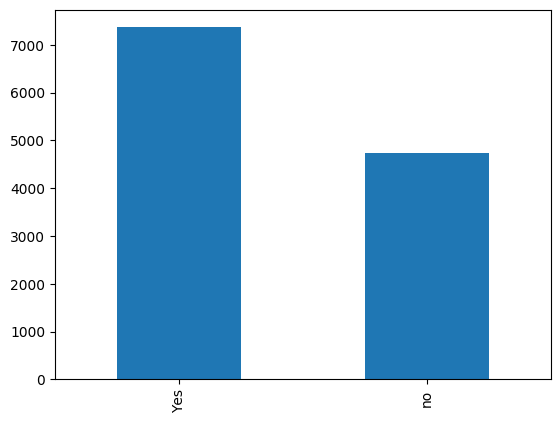

In [8]:
#Count the numvbber of files that have been downloaded
copd['Downloaded'].value_counts().plot(kind='bar')

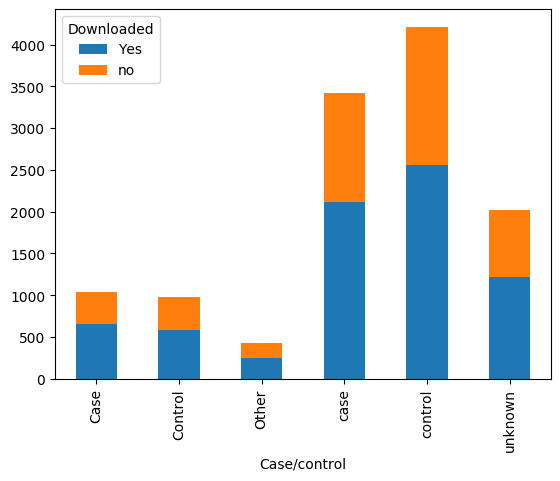

In [9]:
#Count the number of cases and controls that have been downloaded
copd.groupby(['Case/control', 'Downloaded']).size().unstack().plot(kind='bar', stacked=True)

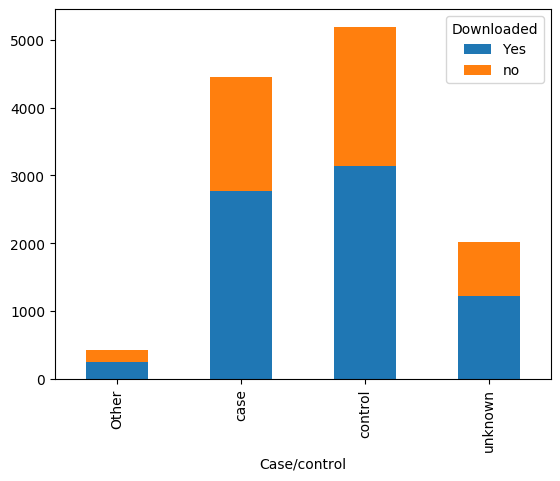

In [10]:
#Replace Case with case and replace Control with control
copd['Case/control'] = copd['Case/control'].str.replace('Case', 'case')
copd['Case/control'] = copd['Case/control'].str.replace('Control', 'control')
copd.groupby(['Case/control', 'Downloaded']).size().unstack().plot(kind='bar', stacked=True)

In [11]:
#Clean the dataset
copd_download = copd[copd['Downloaded'] == 'Yes']
copd_download

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
0,chest,case,2,DS-CS,Yes,tar,COPDGene_A00282.tar.gz,phs000179,GOLD_3,CT,d1992781,Caucasian,female,535650641,NaN
1,chest,case,2,DS-CS,Yes,tar,COPDGene_A00282_COPDGene_A00282.tar,phs000179,3,CT,d1984662,Caucasian,female,1008240640,NaN
2,chest,control,1,HMB,Yes,tar,COPDGene_A00444.tar.gz,phs000179,GOLD_0_Control,CT,d1990538,African,male,620153587,NaN
3,chest,control,1,HMB,Yes,tar,COPDGene_A00444_COPDGene_A00444.tar,phs000179,0,CT,d1975802,African American,male,1237340160,1.0
4,chest,control,1,HMB,Yes,tar,COPDGene_A00975_COPDGene_A00975.tar,phs000179,0,CT,d1975803,African American,male,1664419840,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363,chest,case,1,HMB,Yes,tar,COPDGene_Q77447_COPDGene_Q77447.tar,phs000179,2,CT,d1978508,Caucasian,male,1957355520,NaN
7364,chest,case,1,HMB,Yes,tar,COPDGene_Q77609_COPDGene_Q77609.tar,phs000179,2,CT,d1978509,Caucasian,male,2008401920,NaN
7365,chest,unknown,1,HMB,Yes,tar,COPDGene_Q77837_COPDGene_Q77837.tar,phs000179,-1,CT,d1977762,African American,female,1332592640,NaN
7366,chest,unknown,1,HMB,Yes,tar,COPDGene_Q77990_COPDGene_Q77990.tar,phs000179,-1,CT,d1977763,African American,female,918169600,NaN


In [12]:
copd_download.drop(columns=['File format'], inplace=True)
copd_download.drop(columns=['Unnamed: 14'], inplace=True)
#Replace tar and tar.gz in hte file name with nothing
copd_download['File Name'] = copd_download['File Name'].str.replace('.tar', '')
copd_download['File Name'] = copd_download['File Name'].str.replace('.gz', '')
copd_download

/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after remov

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female,535650641
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,3,CT,d1984662,Caucasian,female,1008240640
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male,620153587
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,0,CT,d1975802,African American,male,1237340160
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,0,CT,d1975803,African American,male,1664419840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,2,CT,d1978508,Caucasian,male,1957355520
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,2,CT,d1978509,Caucasian,male,2008401920
7365,chest,unknown,1,HMB,Yes,COPDGene_Q77837_COPDGene_Q77837,phs000179,-1,CT,d1977762,African American,female,1332592640
7366,chest,unknown,1,HMB,Yes,COPDGene_Q77990_COPDGene_Q77990,phs000179,-1,CT,d1977763,African American,female,918169600


In [13]:
copd_files = copd_download["File Name"].to_list()
copd_files

['COPDGene_A00282',
 'COPDGene_A00282_COPDGene_A00282',
 'COPDGene_A00444',
 'COPDGene_A00444_COPDGene_A00444',
 'COPDGene_A00975_COPDGene_A00975',
 'COPDGene_A01052',
 'COPDGene_A01052_COPDGene_A01052',
 'COPDGene_A01133_COPDGene_A01133',
 'COPDGene_A01751_COPDGene_A01751',
 'COPDGene_A02050_COPDGene_A02050',
 'COPDGene_A02098',
 'COPDGene_A02098_COPDGene_A02098',
 'COPDGene_A02797_COPDGene_A02797',
 'COPDGene_A03795_COPDGene_A03795',
 'COPDGene_A04559_COPDGene_A04559',
 'COPDGene_A04808',
 'COPDGene_A04808_COPDGene_A04808',
 'COPDGene_A05032_COPDGene_A05032',
 'COPDGene_A05113_COPDGene_A05113',
 'COPDGene_A05779_COPDGene_A05779',
 'COPDGene_A06327_COPDGene_A06327',
 'COPDGene_A06333_COPDGene_A06333',
 'COPDGene_A06387',
 'COPDGene_A06387_COPDGene_A06387',
 'COPDGene_A06636_COPDGene_A06636',
 'COPDGene_A07157_COPDGene_A07157',
 'COPDGene_A07385_COPDGene_A07385',
 'COPDGene_A07406_COPDGene_A07406',
 'COPDGene_A07466',
 'COPDGene_A07466_COPDGene_A07466',
 'COPDGene_A07688',
 'COPDGene_A

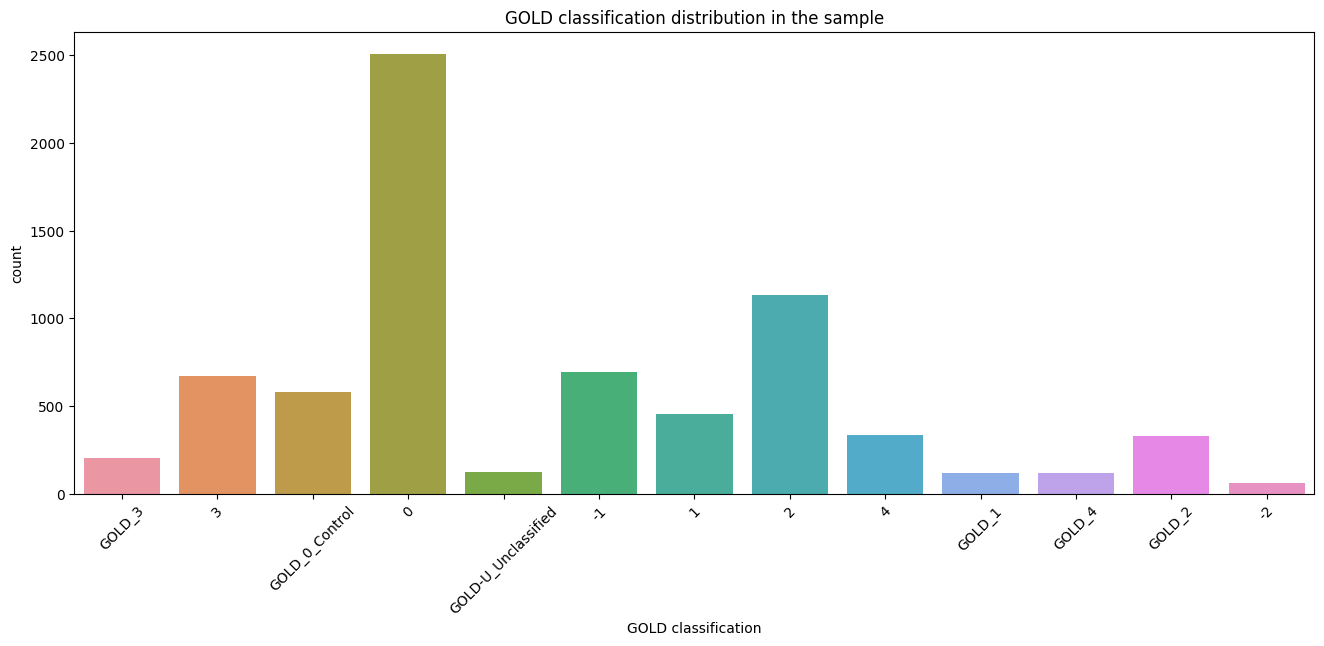

In [14]:
#Plot the GOLD classification
plt.figure(figsize=(16,6))
sns.countplot(x='GOLD classification', data=copd_download)
plt.title('GOLD classification distribution in the sample')
plt.xticks(rotation=45)
plt.show()

In [15]:
#GOLD Classification: 
#-2: Non smoker Control 
#-1 : GOLD-U_unclassified 
#0: GOLD 0 
#1: GOLD 1
#2: GOLD 2
#3: GOLD 3
#4: GOLD 4

copd_download.drop(columns=['Size'], inplace=True)
copd_download

/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,3,CT,d1984662,Caucasian,female
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,0,CT,d1975802,African American,male
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,0,CT,d1975803,African American,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,2,CT,d1978509,Caucasian,male
7365,chest,unknown,1,HMB,Yes,COPDGene_Q77837_COPDGene_Q77837,phs000179,-1,CT,d1977762,African American,female
7366,chest,unknown,1,HMB,Yes,COPDGene_Q77990_COPDGene_Q77990,phs000179,-1,CT,d1977763,African American,female


In [16]:
copd_download['GOLD classification'] = copd_download['GOLD classification'].replace(0, 'GOLD_0_Control')
copd_download['GOLD classification'] = copd_download['GOLD classification'].replace(1, 'GOLD_1')
copd_download['GOLD classification'] = copd_download['GOLD classification'].replace(2, 'GOLD_2')
copd_download['GOLD classification'] = copd_download['GOLD classification'].replace(3, 'GOLD_3')
copd_download['GOLD classification'] = copd_download['GOLD classification'].replace(4, 'GOLD_4')
copd_download['GOLD classification'] = copd_download['GOLD classification'].replace(-1, 'GOLD_U_Unclassified')
copd_download['GOLD classification'] = copd_download['GOLD classification'].replace(-2, 'Non_smoker_control')
copd_download

/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1975802,African American,male
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,GOLD_0_Control,CT,d1975803,African American,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male
7365,chest,unknown,1,HMB,Yes,COPDGene_Q77837_COPDGene_Q77837,phs000179,GOLD_U_Unclassified,CT,d1977762,African American,female
7366,chest,unknown,1,HMB,Yes,COPDGene_Q77990_COPDGene_Q77990,phs000179,GOLD_U_Unclassified,CT,d1977763,African American,female


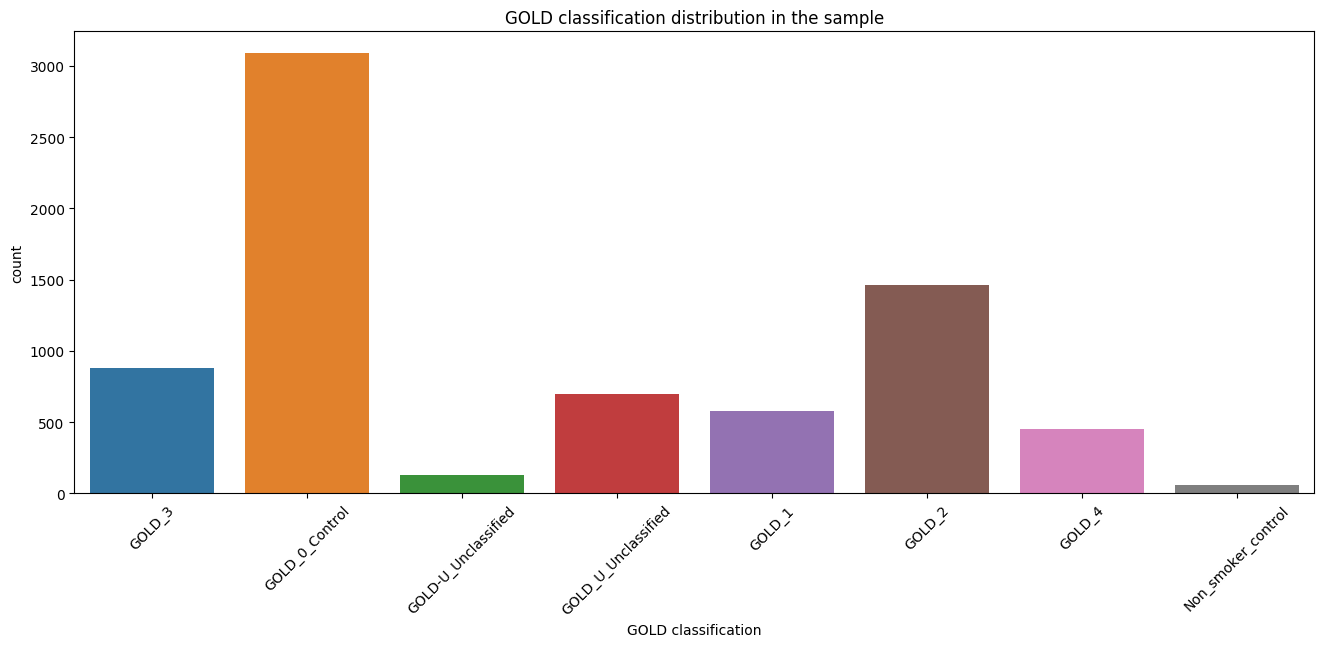

In [17]:
plt.figure(figsize=(16,6))
sns.countplot(x='GOLD classification', data=copd_download)
plt.title('GOLD classification distribution in the sample')
plt.xticks(rotation=45)
plt.show()

/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


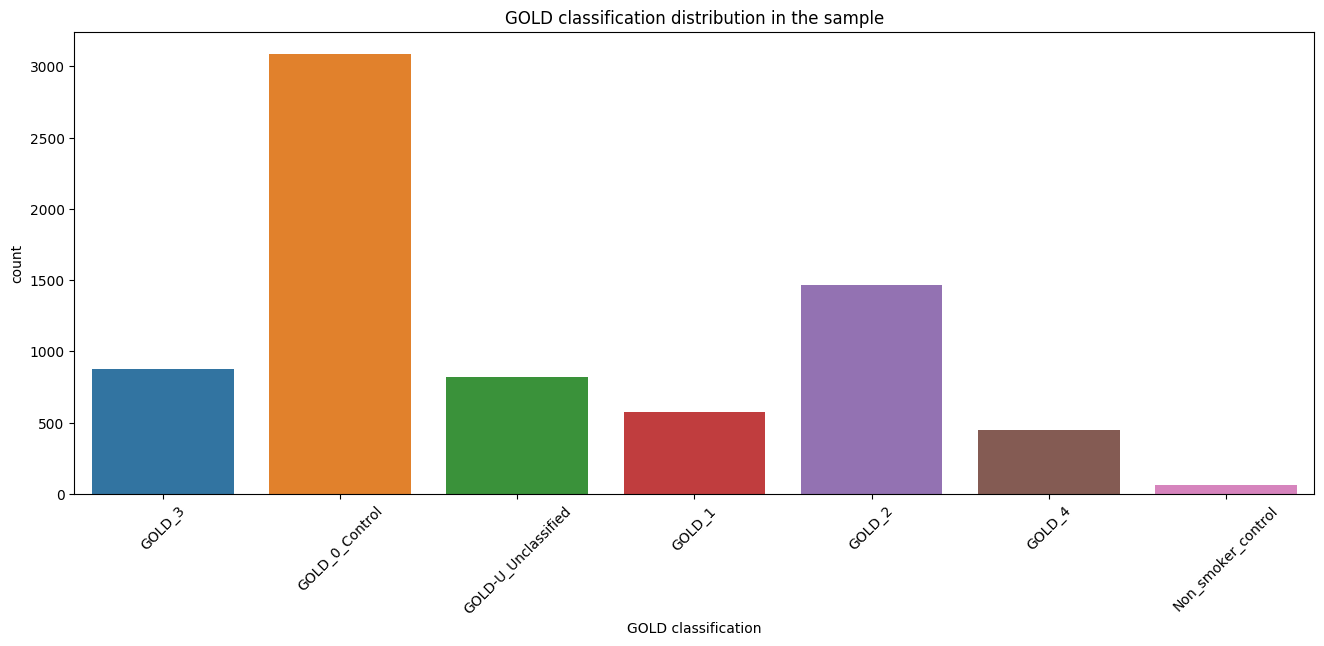

In [18]:
copd_download['GOLD classification'] = copd_download['GOLD classification'].replace('GOLD_U_Unclassified','GOLD-U_Unclassified')
plt.figure(figsize=(16,6))
sns.countplot(x='GOLD classification', data=copd_download)
plt.title('GOLD classification distribution in the sample')
plt.xticks(rotation=45)
plt.show()

In [19]:
copd_download.to_csv("/fs5/p_masi/krishar1/COPDGENE/COPD_gene_7368subjects.csv", index=False)